In [1]:
#---------------------- Header 
from easydict import EasyDict
import os
import json
args = EasyDict()

#------ image list 
i_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20221227015155_09806_00006119_L1G/0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png"

#------ tif list 
t_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20221227015155_09806_00006119_L1G/C1_20221227015155_09806_00006119_L1G_RGB.tif"

#------ Coordinates filtering function
args.txt_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20221227015155_09806_00006119_L1G/1RCoordinate.txt"

args.xml_path = None


#------ gpu
args.gpu_id = 0

#------ model 
args.img_path = i_1

print( '/'.join( args.img_path.split("/")[0:-1]) )
args.infer_threshold = 0.2
args.infer_threshold_showing = 0.2
source_root ='/'.join( args.img_path.split("/")[0:-1])

args.img_output = args.img_path.replace(".png" ,"_output_v1_0111.png")
args.img_output_masked = args.img_path.replace(".png" ,"_output_v1_0111_Masked.png")
args.img_output_scatter = args.img_path.replace(".png" ,"_output_v1_0111_Scatter.png")

args.csv_output = args.img_path.replace(".png","_output_v1_0111.csv")
args.csv_output_masked =args.img_path.replace(".png","_masked_v1_0130.csv")
args.csv_output_scatter = args.img_path.replace(".png","scatter_v1_0111.csv")


#------ Map Shape 
# old mask
#args.map_path = os.path.join(source_root, "map")
#args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Old"
# new mask 
args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Korea_Clipped"


#------ TIF 
args.tf_path = t_1

# time 2023 05 23 04 50 50
args.year_= int( i_1 .split("/")[-2].split("_")[1][0:4])
args.month_ = int(i_1 .split("/")[-2].split("_")[1][4:6])
args.day_ = int(i_1 .split("/")[-2].split("_")[1][6:8])
hour_ = int(i_1 .split("/")[-2].split("_")[1][8:10])
args.hour_ = hour_ + 9
args.min  = int(i_1 .split("/")[-2].split("_")[1][10:12]) 
args.sec =  0
print("time : ", args.year_, args.month_, args.day_, args.hour_, args.min)

#------ AIS csv ---------------------------------------------------------------------------

ais_root_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/1차-3개"
ais_root_2 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개"

if str(args.year_) == "2022":
    ais_root = ais_root_1
elif str(args.year_) == "2023":
    ais_root = ais_root_2


#-------
if len(str(args.month_)) ==1:
    args.month_ = str("0") + str(args.month_)

if len(str(args.day_)) ==1:
    args.day_ = str("0") + str(args.day_)

print(str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv"))
csv_name = str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv")
args.data_path = os.path.join( ais_root , csv_name)
print(args.data_path)
if os.path.exists(args.data_path):
    print("#------------------ : csv exists")
else:
    print("#------------------ : no csv found")

args.static_data_path = args.data_path.replace("_dynamic.csv","_static.csv")
args.final_merge = args.img_path.replace(".png",".csv")

# time gap
# 시각화 결과물에서 ais 좌표가 해상도가 더 높아지게 된다. 
args.time_gap_min = 5
args.time_gap_sec = False

#--------------------------------------------------------------------------------------------

# pixel gap 
# this is for visualization
args.pixel_gap = 200

# # latlon gap 
# # 매칭되는 박스와 ais 간의 기준 => 늘리면 R_ 데이터프레임에서 매칭 케이스가 늘어나게 된다. 
# args.latlon_gap = 0.000001

#------ Model Inference 
args.model_test = False
args.Box_Matching = True
args.png_draw_save = True


# Save EasyDict to a file
file_path = os.path.join(source_root ,"config.json" )
with open(file_path, 'w') as json_file:
    json.dump(args, json_file, indent=4)

/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20221227015155_09806_00006119_L1G
time :  2022 12 27 10 51
202212271000_dynamic.csv
/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/1차-3개/202212271000_dynamic.csv
#------------------ : csv exists


In [2]:
# get time

from PIL import Image
from PIL.TiffTags import TAGS

with Image.open(args.tf_path ) as img:
    meta_dict = {TAGS[key] : img.tag[key] for key in img.tag}

import rasterio
meta_dict_r = rasterio.open(args.tf_path)

In [3]:
'''
raterio 로, tif 에서 spatial-resolution 찾는 방법
아니면 그냥 xml 들어가서 "gsd" 로 키워드 찾으면 나온다. 


Metadata:
  
  TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)

'''

meta_dict_r.res



(2.0, 2.0)

In [4]:
from datetime import datetime

# Your input string
input_string =  str(args.year_) + str(args.month_) + str(args.day_) + str(args.hour_) +  str(args.min)

# Specify the format of the input string
input_format = "%Y%m%d%H%M"

# Convert the string to a datetime object
datetime_object = datetime.strptime(input_string, input_format)

# Now you have a datetime object, and you can work with it as needed
print(datetime_object)


2022-12-27 10:51:00


In [5]:
input_string

'202212271051'

In [6]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)

In [12]:
img_.size

(7410, 7220)

In [29]:
import numpy as np 
np_img = np.array(img_)
np_img[0:1][0]

255, 0, 0 

(255, 0, 0)

In [ ]:
# sliding window 
# 70 % 이상 black 이면은 다 날리기 

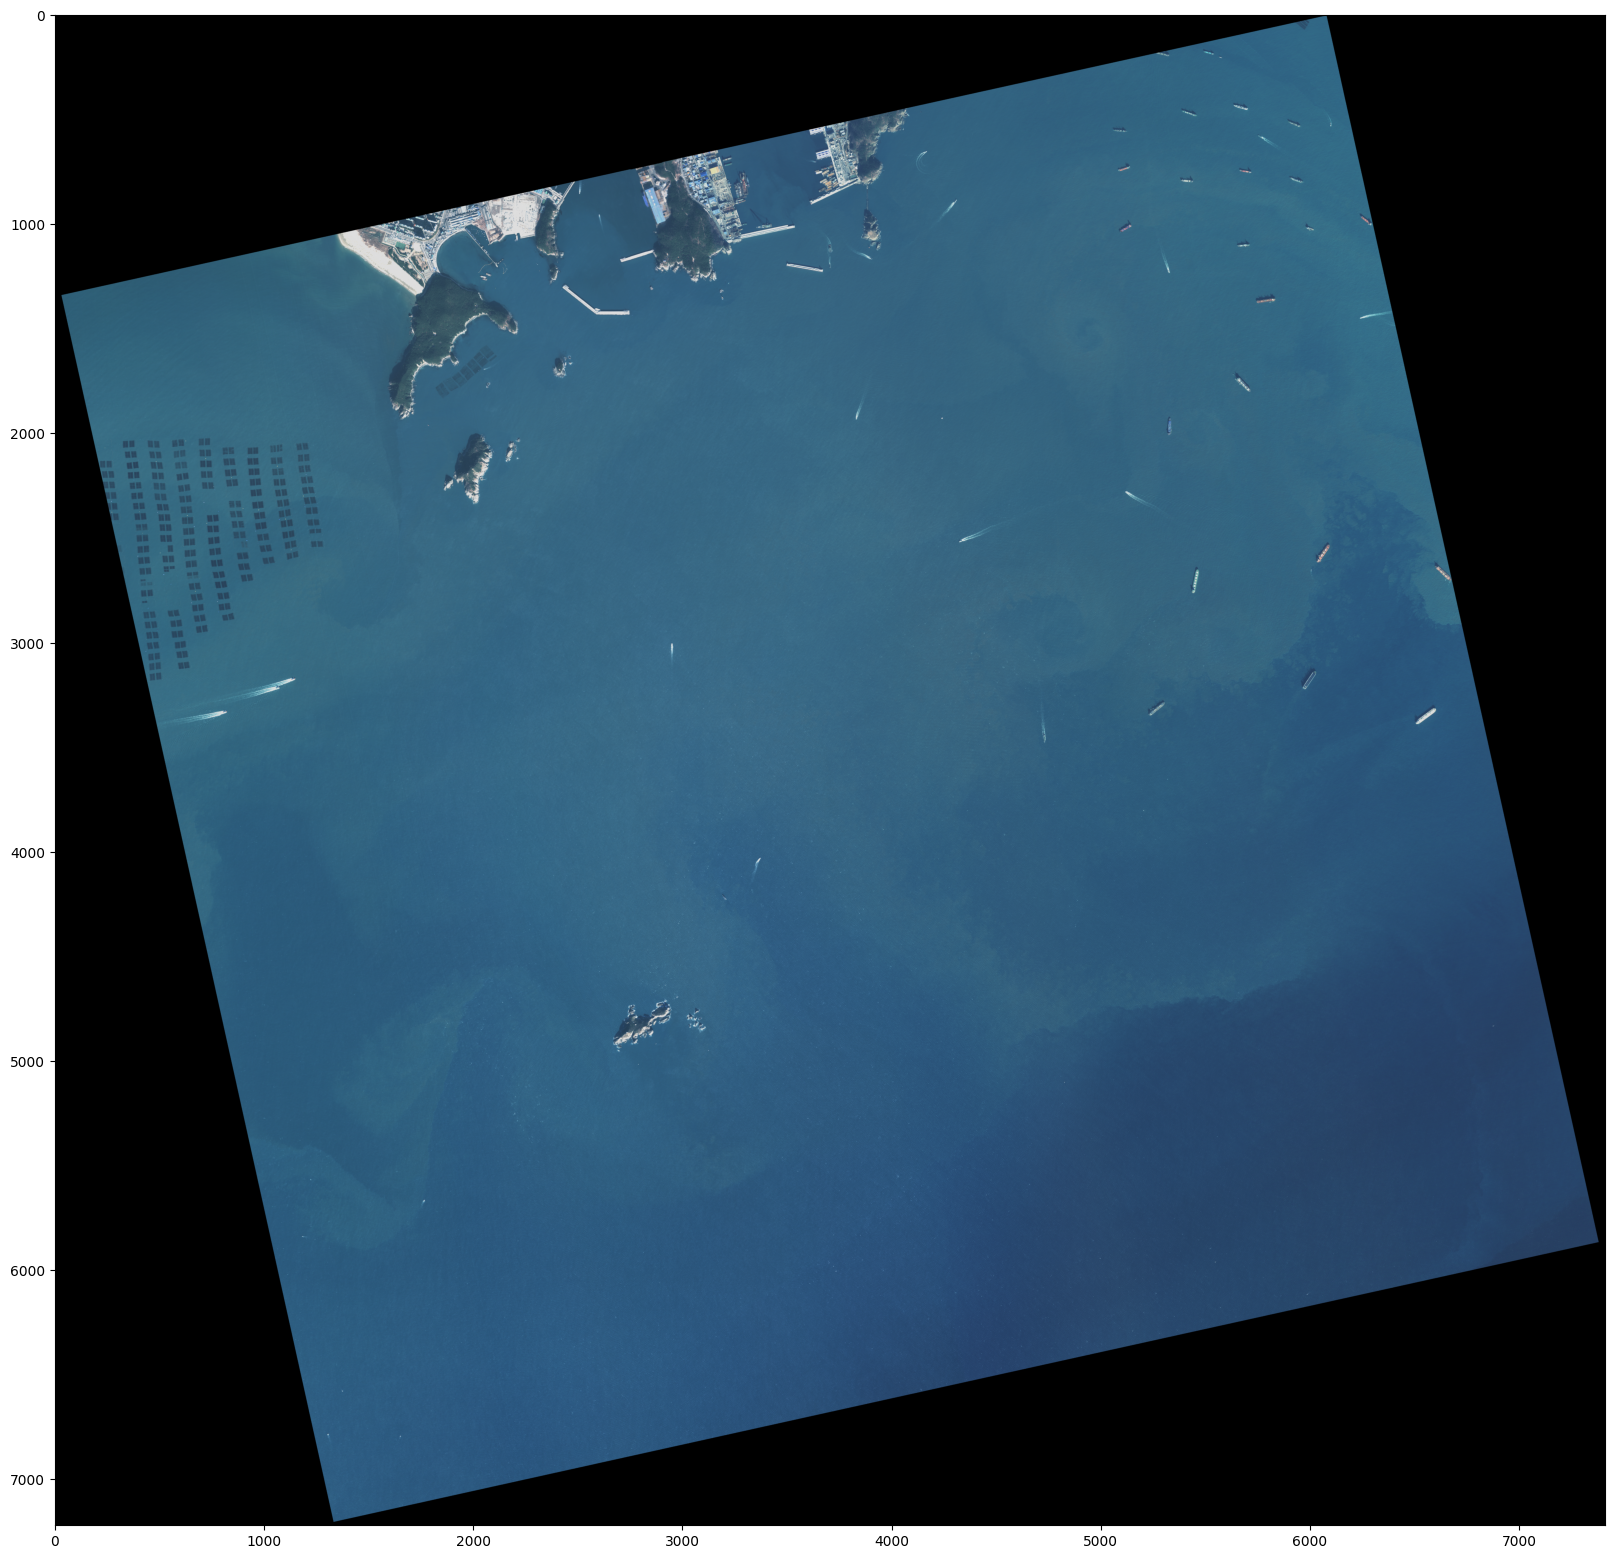

In [11]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,20))
plt.imshow(img_)

In [63]:
!nvidia-smi

Tue Jan 30 16:08:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090        On  | 00000000:3B:00.0 Off |                  N/A |
|  0%   29C    P8              32W / 350W |     12MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 1. Model Inference

In [64]:
import testModule

if args.model_test:
    result = testModule.infer_model(input_file_path=args.img_path,\
                        thres=args.infer_threshold , gpu_id = 0)

#------------------------
# result save
import numpy as np
import os 
save_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/Inference_results"
file_name = args.img_path.split("/")[-1].split(".")[0]+".npy"    

if args.model_test == False:
    result = np.load(os.path.join(save_root,file_name))
else:
    print("Result Saved")
    np.save(os.path.join(save_root,file_name), result)

# 2. AIS csv 

- time condition 에 맞게 filtering 

In [65]:
import pandas as pd

df = pd.read_csv(args.data_path)

In [66]:
#---- current time ----#
import datetime
year_= args.year_
month_ = args.month_ 
day_ = args.day_
hour_ = args.hour_
min  = args.min
sec =  args.sec
crit_time_str = f"{year_}-{month_}-{day_} {hour_}:{min}:{sec}"
date = pd.to_datetime(crit_time_str)

#---- time condition ----#
time_gap_min = args.time_gap_min
time_gap_sec = args.time_gap_sec

earl_time = date - datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)
post_time = date + datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)

print("early : ",earl_time)
print("now : ",date)
print("late : ",post_time)



early :  2022-12-27 10:46:00
now :  2022-12-27 10:51:00
late :  2022-12-27 10:56:00


In [67]:
df.columns

Index(['mmsi_', 'time', 'lon_', 'lat_', 'heading_', 'turn_', 'speed_'], dtype='object')

In [68]:
df.columns = ['mmsi_', 'time', 'long', 'lat', 'heading_', 'turn_', 'speed_']

In [69]:
df

mmsi_                 time        long        lat  heading_  turn_  \
0      311049600  2022-12-27 10:00:00  129.320878  34.955367       305    0.0   
1      440414850  2022-12-27 10:00:00  129.050902  35.123505       141    0.0   
2      440116550  2022-12-27 10:00:00  129.069312  35.110957       511 -128.0   
3      440409790  2022-12-27 10:00:00  129.077403  35.103573       511 -128.0   
4      440132370  2022-12-27 10:00:00  129.061967  35.021985       248    0.0   
...          ...                  ...         ...        ...       ...    ...   
45336  440119000  2022-12-27 10:59:59  129.064067  35.126300        34    0.0   
45337  441439000  2022-12-27 10:59:59  129.047475  35.096155       182 -128.0   
45338  440132140  2022-12-27 10:59:59  129.006823  34.815038        36   -1.0   
45339  440100190  2022-12-27 10:59:59  129.090590  35.107432       232   -0.0   
45340  440122620  2022-12-27 10:59:59  129.056842  35.104293       511 -128.0   

       speed_  
0        15.5  
1         0.0  
2         0.0  
3         0.1  
4         0.5  
...       ...  
45336     0.1  
45337     0.0  
45338     9.7  
45339     0.1  
45340     0.9  

[45341 rows x 7 columns]

In [70]:
#---- filtering datetime ---# 
# 
time_ = []
for i,row in df.iterrows():
    #print(row["time"])
    time_.append( pd.to_datetime( row["time"] ) )
df["datetime"] = time_

con1 = df["datetime"] < post_time 
con2 = df["datetime"] > earl_time

#--- exec ---#
time_filter_flag = True

if time_filter_flag:
    t_df = df.loc[con1 & con2] 
    df.loc[con1 & con2]
else:
    t_df = df
    t_df

In [71]:
t_df

mmsi_                 time        long        lat  heading_  turn_  \
34181  441208000  2022-12-27 10:46:01  129.208617  35.114733        54    0.0   
34182  477798100  2022-12-27 10:46:01  129.062008  35.008732        16   -0.0   
34183  440100580  2022-12-27 10:46:01  129.068287  35.109775       511 -128.0   
34184  440154440  2022-12-27 10:46:01  129.058487  35.061922       129    0.0   
34185  440111150  2022-12-27 10:46:01  129.038943  35.098530       511 -128.0   
...          ...                  ...         ...        ...       ...    ...   
42309  447184000  2022-12-27 10:55:59  129.402317  34.941067        50    1.0   
42310  440031781  2022-12-27 10:55:59  129.049825  35.122892       511  314.0   
42311  440197000  2022-12-27 10:55:59  129.032868  34.990220       185    0.0   
42312  440108810  2022-12-27 10:55:59  129.068840  35.096083       511 -128.0   
42313  440001020  2022-12-27 10:55:59  129.054442  35.101060       126    0.0   

       speed_            datetime  
34181    12.9 2022-12-27 10:46:01  
34182     1.4 2022-12-27 10:46:01  
34183     0.0 2022-12-27 10:46:01  
34184     3.3 2022-12-27 10:46:01  
34185     0.2 2022-12-27 10:46:01  
...       ...                 ...  
42309     4.9 2022-12-27 10:55:59  
42310     0.0 2022-12-27 10:55:59  
42311    13.6 2022-12-27 10:55:59  
42312     0.3 2022-12-27 10:55:59  
42313     0.0 2022-12-27 10:55:59  

[8133 rows x 8 columns]

# 3. Coordinates filtering


In [72]:
# Coordinates filtering function ! 

if args.txt_path != None:
    txt_path = args.txt_path
    f = open(txt_path,'r')
    lines = f.readlines()
    lines

    top_left =     lines[1]
    bottom_right = lines[-1]

    min_long = float( top_left.split(":")[1].split(",")[1][0:10] )
    max_long = float( bottom_right.split(":")[1].split(",")[1][0:10] ) 

    min_lat  = float( bottom_right.split(":")[1].split(",")[0][0:10] ) 
    max_lat  = float( top_left.split(":")[1].split(",")[0][0:10] ) 

elif args.xml_path != None:
    # XML parsing
    import xml.etree.ElementTree as ET

    xml_path = args.xml_path
    tree = ET.parse(args.xml_path)
    root = tree.getroot() 


    Top_left = []
    Bottom_right = []

    for child in root:
        if child.tag =="Image":
            print(child)
            for grand_child in child:
                if grand_child.tag =="PAN":
                    for gg_child in grand_child:
                        #print(gg_child.tag)
                        if gg_child.tag == "ImagingCoordinates":
                            for ggg in gg_child:
                                
                                if ggg.tag =="ImageGeogTL":
                                    # print(ggg.tag)                         
                                    # print(ggg[0].text)
                                    # print(ggg[1].text)
                                    Top_left.append(float(ggg[0].text))
                                    Top_left.append(float(ggg[1].text))
                                elif ggg.tag == "ImageGeogBR":
                                    # print(ggg.tag)                         
                                    # print(ggg[0].text)
                                    # print(ggg[1].text)
                                    Bottom_right.append(float(ggg[0].text))
                                    Bottom_right.append(float(ggg[1].text))
    
    min_long = Top_left[1]
    max_long = Bottom_right[1]
    min_lat = Bottom_right[0]
    max_lat = Top_left[0]

# 35.032614576
# 128.632902263
# ImageGeogBR
# 34.852878881
# 128.904069499

print(min_long,max_long,min_lat,max_lat)
                                

128.929336 129.091733 34.9613267 35.0427102


# 3.1 공간해상도 구하기

- (max_long - min_long) / image_size of x 

In [129]:
x_max , y_max = img_.size

In [132]:
max_long - min_long

0.16239699999999857

In [125]:
# pixel 당 2.19 long
(max_long - min_long) / x_max

2.191592442645055e-05

In [127]:
# pixel 당 1.12 lat 
(max_lat - min_lat) / y_max

1.127195290858742e-05

In [128]:
import math

def measure(lat1, lon1, lat2, lon2):
    # Radius of Earth in KM
    R = 6378.137
    
    # Convert degrees to radians
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    
    a = math.sin(dLat/2) * math.sin(dLat/2) + \
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * \
        math.sin(dLon/2) * math.sin(dLon/2)
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c
    
    # Convert distance to meters
    return d * 1000

In [134]:
a_ = measure(20,max_long, 20, min_long)
print(a_)
meter_per_pixel = a_ / x_max
print(meter_per_pixel)

16987.716813918058
2.2925393810955543


In [ ]:
# def measure_lat_lon_meter(lat1, lon1, lat2, lon2):
#     ar R = 6378.137; // Radius of earth in KM
#     var dLat = lat2 * Math.PI / 180 - lat1 * Math.PI / 180;
#     var dLon = lon2 * Math.PI / 180 - lon1 * Math.PI / 180;
#     var a = Math.sin(dLat/2) * Math.sin(dLat/2) +
#     Math.cos(lat1 * Math.PI / 180) * Math.cos(lat2 * Math.PI / 180) *
#     Math.sin(dLon/2) * Math.sin(dLon/2);
#     var c = 2 * Math.atan2(Math.sqrt(a), Math.sqrt(1-a));
#     var d = R * c;

In [73]:
con1 = t_df["long"] > min_long
con2 = t_df["long"] < max_long

con3 = t_df["lat"] > min_lat
con4 = t_df["lat"] < max_lat + 0.0225 # debugged by eric 


#------------------------------------
location_filter_flag = True

if location_filter_flag == True:
    #q_df = df.loc[con1 & con2 & con3 & con4]
    q_df = t_df.loc[con1 & con2 & con3 & con4]
    q_df
else:
    q_df = df

In [74]:
q_df

mmsi_                 time        long        lat  heading_  turn_  \
34182  477798100  2022-12-27 10:46:01  129.062008  35.008732        16   -0.0   
34184  440154440  2022-12-27 10:46:01  129.058487  35.061922       129    0.0   
34193  273294090  2022-12-27 10:46:02  129.059712  35.057677       294    0.0   
34194  440197000  2022-12-27 10:46:02  129.034097  35.026432       180    0.0   
34197  440116970  2022-12-27 10:46:02  129.005443  35.052055       511 -128.0   
...          ...                  ...         ...        ...       ...    ...   
42277  440156960  2022-12-27 10:55:57  129.061067  35.048633       511 -128.0   
42284  440319740  2022-12-27 10:55:58  129.089963  35.047222       259  127.0   
42288  440033820  2022-12-27 10:55:58  129.029815  35.064220       511 -128.0   
42291  440704880  2022-12-27 10:55:58  129.005317  35.058698       295 -127.0   
42311  440197000  2022-12-27 10:55:59  129.032868  34.990220       185    0.0   

       speed_            datetime  
34182     1.4 2022-12-27 10:46:01  
34184     3.3 2022-12-27 10:46:01  
34193     0.1 2022-12-27 10:46:02  
34194    13.3 2022-12-27 10:46:02  
34197     4.3 2022-12-27 10:46:02  
...       ...                 ...  
42277     0.0 2022-12-27 10:55:57  
42284    11.5 2022-12-27 10:55:58  
42288     0.1 2022-12-27 10:55:58  
42291     9.8 2022-12-27 10:55:58  
42311    13.6 2022-12-27 10:55:59  

[1395 rows x 8 columns]

In [75]:
import utm
import rasterio

#-------------------
# utm => pixels 
#------------------
utm_array =[] # long lat 
#--- csv 
# latlong --> utm
for lat,lon in zip(q_df['lat'].values,q_df['long'].values):
    #print(lat)
    # if lat < 80:
    res = utm.from_latlon(lat,lon,52,"N")
    utm_array.append(res)

# 전환한 utm_array 를 데이터프레임에 병합 
q_df['utm_array']= utm_array


pixels_=[] # utm_array 를 pixels_ 로 변경 
tf_path = args.tf_path
with rasterio.open(tf_path) as map_layer:

    for inp in utm_array:
    
        coords2pixels = map_layer.index(inp[0],inp[1]) #input lon,lat # 좌표계 
        pixels_.append(coords2pixels)

q_df['pixels'] = pixels_

#--- init index in q_df
q_df.drop_duplicates(inplace=True)
q_df.reset_index(inplace=True,drop=True)


/tmp/ipykernel_2757566/3391268297.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['utm_array']= utm_array
/tmp/ipykernel_2757566/3391268297.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['pixels'] = pixels_
/tmp/ipykernel_2757566/3391268297.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df.drop_

In [76]:
# # remove duplicate row 
# [i[1:-1] for i in q_df['time']]
# # pd.to_datetime( )

In [77]:
q_df

mmsi_                 time        long        lat  heading_  turn_  \
0     477798100  2022-12-27 10:46:01  129.062008  35.008732        16   -0.0   
1     440154440  2022-12-27 10:46:01  129.058487  35.061922       129    0.0   
2     273294090  2022-12-27 10:46:02  129.059712  35.057677       294    0.0   
3     440197000  2022-12-27 10:46:02  129.034097  35.026432       180    0.0   
4     440116970  2022-12-27 10:46:02  129.005443  35.052055       511 -128.0   
...         ...                  ...         ...        ...       ...    ...   
1390  440156960  2022-12-27 10:55:57  129.061067  35.048633       511 -128.0   
1391  440319740  2022-12-27 10:55:58  129.089963  35.047222       259  127.0   
1392  440033820  2022-12-27 10:55:58  129.029815  35.064220       511 -128.0   
1393  440704880  2022-12-27 10:55:58  129.005317  35.058698       295 -127.0   
1394  440197000  2022-12-27 10:55:59  129.032868  34.990220       185    0.0   

      speed_            datetime  \
0        1.4 2022-12-27 10:46:01   
1        3.3 2022-12-27 10:46:01   
2        0.1 2022-12-27 10:46:02   
3       13.3 2022-12-27 10:46:02   
4        4.3 2022-12-27 10:46:02   
...      ...                 ...   
1390     0.0 2022-12-27 10:55:57   
1391    11.5 2022-12-27 10:55:58   
1392     0.1 2022-12-27 10:55:58   
1393     9.8 2022-12-27 10:55:58   
1394    13.6 2022-12-27 10:55:59   

                                            utm_array        pixels  
0      (505657.73179955786, 3874013.167270966, 52, N)  (3233, 6051)  
1      (505333.0121160295, 3879911.5777133103, 52, N)   (284, 5888)  
2       (505444.9929596757, 3879440.884802524, 52, N)   (519, 5944)  
3      (503110.4068575473, 3875974.8104777317, 52, N)  (2252, 4777)  
4     (500496.36800225655, 3878815.8045170875, 52, N)   (832, 3470)  
...                                               ...           ...  
1390   (505569.16609829356, 3878438.005392133, 52, N)  (1021, 6006)  
1391    (508204.5547319706, 3878283.524123209, 52, N)  (1098, 7324)  
1392   (502718.5407616721, 3880165.2625317476, 52, N)   (157, 4581)  
1393   (500484.8383137815, 3879552.4940794664, 52, N)   (463, 3464)  
1394   (502999.6162488097, 3871958.9939949648, 52, N)  (4260, 4722)  

[1395 rows x 10 columns]

In [78]:
q_df.to_csv(args.csv_output_scatter,index=False)

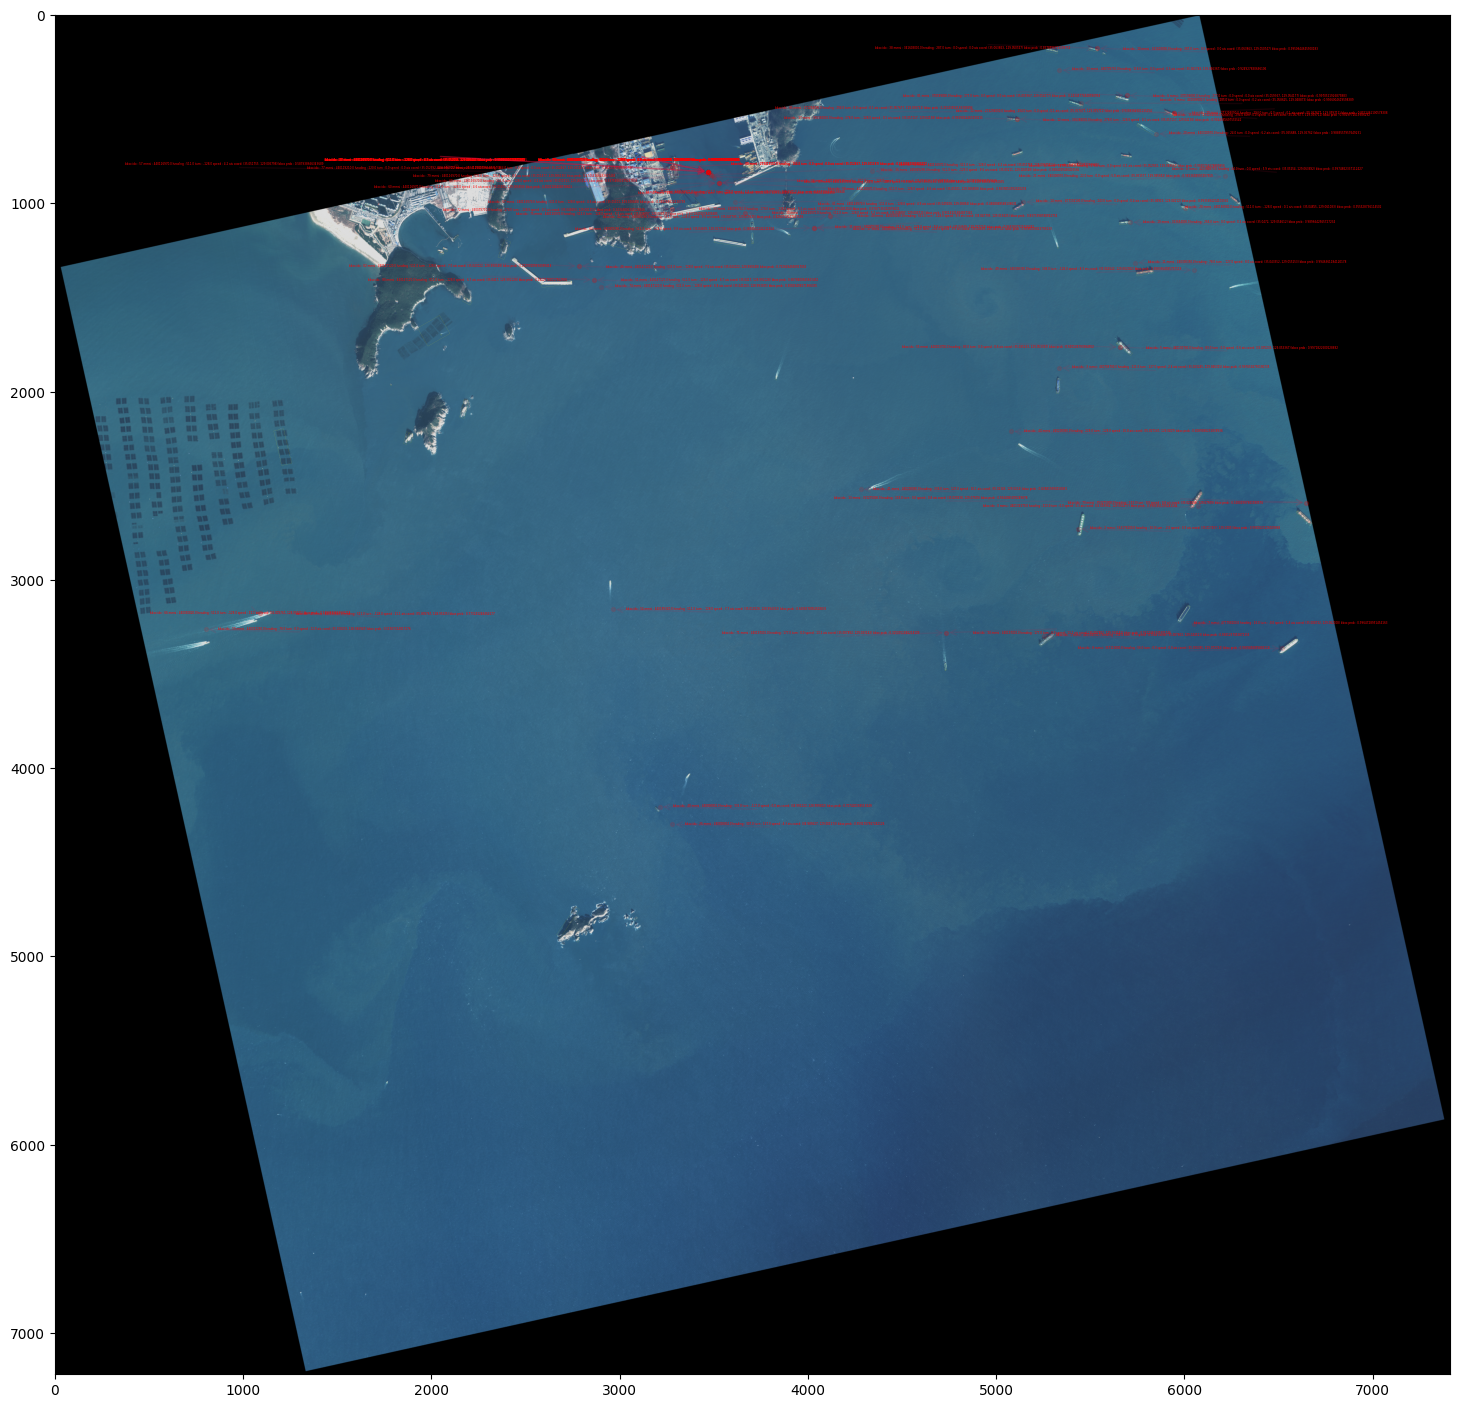

In [79]:
#------------------------------

# Code Backup ! 

#------------------------------
# AIS matching with Bbox

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
#plt.imshow(img_)
ax = plt.gca()

# Bounding Box 
# Thresholding filtering 
bboxes_ = [] 
cnt = 0
for r in result[0]:
    if r[-1] > args.infer_threshold_showing:
        cnt+=1
        bboxes_.append(r)

#----------------------------------------------------- 
# BBox matching with AIS 

# Matched Bbox
idx_bboxes = []
x_bboxes = [] 
y_bboxes = []
width_bboxes = []
height_bboxes = []
angle_bboxes = []
prob_bboxes= []

# Matched AIS 
x_matched_ais = []
y_matched_ais = []
time_matched_ais = []
idxss_matched_ais = []
lat_matched_ais = []
long_matched_ais = []

mmsi_matched_ais = []
heading_matched_ais = []
turn_matched_ais = []
speed_matched_ais = []


# 데이터들은 q_df 써서 활용하는 것을 원칙으로 한다. 
x_ais = [i[1] for i in q_df["pixels"].values]
y_ais = [i[0] for i in q_df["pixels"].values]
lat_ais  = [i for i in q_df['lat'].values]
long_ais = [i for i in q_df['long'].values]
mmsi_ = [i for i in q_df['mmsi_'].values]
heading_ = [i for i in q_df['heading_'].values]
turn_ = [i for i in q_df['turn_'].values]
speed_ = [i for i in q_df['speed_'].values]

idx_ais = [i for i in q_df.index.values]
# debugged by Eric 
time_ais = [i for i in q_df['time']]


for bidx, box_ in enumerate( bboxes_):
    x = box_[0]
    y = box_[1]
    width =  box_[2]
    height = box_[3]
    angle_ = box_[4]
    prob_  = box_[5]
    

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, 
                                linewidth=0.1, edgecolor="yellow", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi,
                                alpha=0.35)
    
    ax.add_patch(path_obj)


    #--- find matched AIS with each box 
    cnt =0 
    for a,b,ix,t,lat_,long_,mmsi,heading,turn,speed in zip(x_ais,y_ais,idx_ais,time_ais, lat_ais,long_ais, mmsi_,heading_,turn_,speed_):
        
        # 각 bbox 범위안에 들어오는 ais 중에서 첫번쨰 ais 만 리스트에 저장 
        if cnt ==1:
            break

        # if bbox matched with ais 
        if (x - args.pixel_gap < a < x + args.pixel_gap) & (y - args.pixel_gap < b < y + args.pixel_gap) :
            
            idx_bboxes.append(bidx)
            x_bboxes.append(x)
            y_bboxes.append(y)
            width_bboxes.append(width)
            height_bboxes.append(height)
            angle_bboxes.append(angle_)
            prob_bboxes.append(prob_)

            #-- 
            x_matched_ais.append(a)
            y_matched_ais.append(b)
            time_matched_ais.append(t)
            idxss_matched_ais.append(ix)
            lat_matched_ais.append(lat_)
            long_matched_ais.append(long_)

            #-- 
            mmsi_matched_ais.append(mmsi) 
            heading_matched_ais.append(heading) 
            turn_matched_ais.append(turn) 
            speed_matched_ais.append(speed) 

            cnt+=1


#----------------------- indent over ! 
# 그렇다면 여기에서 통합된 bbox to ais csv 를 만들어버리자. 

if args.Box_Matching  == True:
    T_ = pd.DataFrame({
        "box index" : idx_bboxes,
        "bbox x coord" : x_bboxes,
        "bbox y coord" : y_bboxes,
        "bbox width" : width_bboxes,
        "bbox height" : height_bboxes,
        "bbox angle" : angle_bboxes,
        "bbox prob" : prob_bboxes,
        
        #-- ais
        "mmsi" : mmsi_matched_ais,
        "heading" : heading_matched_ais,
        "turn" : turn_matched_ais,
        "speed" : speed_matched_ais,

        "ais x coord(pixel)" : x_matched_ais,
        "ais y coord(pixel)" : y_matched_ais, 
        "ais lat"   : lat_matched_ais,
        "ais long"  : long_matched_ais,
        "ais time" : time_matched_ais
    })

    T_.drop_duplicates(inplace=True)

    S_ = {
        'box index':[i for i in range(len(bboxes_)) if i not in idx_bboxes],
        'bbox x coord' : [],
        'bbox y coord' : [],
        'bbox width' : [],
        'bbox height' : [],
        'bbox angle' :[],
        'bbox prob' : [],
        "ais x coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais y coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais lat"   : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais long"  : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais time" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        }

    not_include_boxes = [i for i in range(len(bboxes_)) if i not in idx_bboxes]

    for a in not_include_boxes:
        box_ = bboxes_[a]
        
        S_['bbox x coord'].append(box_[0])
        S_['bbox y coord'].append(box_[1])
        S_['bbox width'].append(box_[2])
        S_['bbox height'].append(box_[3])
        S_['bbox angle'].append(box_[4])
        S_['bbox prob'].append(box_[5])

    S_ = pd.DataFrame(S_)

    M_ = pd.concat([T_,S_])
    #del M_["box index"]
    M_.reset_index(inplace=True,drop=True)


    #----------------
    # Draw matched AIS 
    plt.scatter(x_matched_ais,y_matched_ais, alpha=0.1,color='red',marker='o',s=8)


    #--------------------------------------------
    # among the matched AIS (q_df), label and draw them 
    plt_txts = []

        
    for i,row in M_.iterrows():
        
        a = row['ais lat']
        b = row['ais long']
        c = row['mmsi']
        d = row['heading']
        e = row['turn']
        f = row['speed']
        g = row['bbox prob']

        x = row['ais x coord(pixel)']
        y = row['ais y coord(pixel)']


        if (x ==0) & (y ==0):
            x = row['bbox x coord']
            y = row['bbox y coord']
            name = f'bbox idx : {i}, No matched AIS point'

            #-- matched 가 되지 않은 박스들에는 레이블을 붙이지 않았음 
            #plt_txts.append( plt.text(x, y, name, fontsize =2,color='yellow') )

        else:
            name = f'bbox idx : {i} mmsi : {c} heading : {d} turn : {e} speed : {f} ais coord: {a,b} bbox prob : {g}'
            plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


    #----------------------------------------
    # label overlap avoid 
    adjust_text(plt_txts, 
                force_points=3,
                arrowprops={'arrowstyle' : '->', 
                            'color' : 'crimson',  
                            'alpha' : 0.1}
                )
    # force_points = 3

#---------
# png save and draw
if args.png_draw_save:
    plt.imshow(img_)
    #plt.savefig(args.img_output,dpi =1200 )
    plt.show()

# Code Backup ! 

In [80]:
M_

box index  bbox x coord  bbox y coord  bbox width  bbox height  \
0            0   6062.747559   2576.973633   96.756912    20.105816   
1            1   5267.931152   3319.122803   92.396011    20.180357   
2            2   5451.572754   2709.140137  112.080536    18.148483   
3            3   5328.236816   1970.909668   77.750618    15.707102   
4            4   5934.730469    793.562988   67.259132    11.462839   
..         ...           ...           ...         ...          ...   
109         93   2417.215088    855.254150   19.125841     6.979782   
110         96   2051.063721   1696.903564    9.357801     4.799193   
111         99   2725.744629   4817.617676  179.926620    26.085417   
112        100   2190.556152   1519.788818   45.253174    22.638763   
113        103   3084.234131   4800.146973   19.396666    10.563995   

     bbox angle  bbox prob         mmsi  heading   turn  speed  \
0     -0.966657   0.998536  440132370.0    213.0    0.0    0.3   
1     -0.648144   0.998124  440504030.0    234.0    0.0    0.0   
2     -1.359952   0.998062  563176200.0     16.0   -2.0    0.3   
3     -1.490668   0.997652  440709700.0    111.0  127.0    2.4   
4      0.312443   0.997486  440300970.0     24.0    0.0    5.9   
..          ...        ...          ...      ...    ...    ...   
109    0.719385   0.337390          NaN      NaN    NaN    NaN   
110    0.325931   0.323768          NaN      NaN    NaN    NaN   
111   -0.976662   0.319291          NaN      NaN    NaN    NaN   
112    0.481293   0.309767          NaN      NaN    NaN    NaN   
113   -0.602070   0.305726          NaN      NaN    NaN    NaN   

     ais x coord(pixel)  ais y coord(pixel)    ais lat    ais long  \
0                  6072                2610  35.019962  129.062477   
1                  5252                3296  35.007603  129.044513   
2                  5434                2729  35.017837  129.048500   
3                  5334                1874  35.033245  129.046315   
4                  6126                 804  35.052540  129.063692   
..                  ...                 ...        ...         ...   
109                   0                   0   0.000000    0.000000   
110                   0                   0   0.000000    0.000000   
111                   0                   0   0.000000    0.000000   
112                   0                   0   0.000000    0.000000   
113                   0                   0   0.000000    0.000000   

                ais time  
0    2022-12-27 10:46:10  
1    2022-12-27 10:46:03  
2    2022-12-27 10:46:45  
3    2022-12-27 10:46:04  
4    2022-12-27 10:47:20  
..                   ...  
109                    0  
110                    0  
111                    0  
112                    0  
113                    0  

[114 rows x 16 columns]

In [81]:
M_.iloc[0]['ais time']

'2022-12-27 10:46:10'

In [82]:
M_.to_csv(args.csv_output)
M_[0:10]

box index  bbox x coord  bbox y coord  bbox width  bbox height  bbox angle  \
0          0   6062.747559   2576.973633   96.756912    20.105816   -0.966657   
1          1   5267.931152   3319.122803   92.396011    20.180357   -0.648144   
2          2   5451.572754   2709.140137  112.080536    18.148483   -1.359952   
3          3   5328.236816   1970.909668   77.750618    15.707102   -1.490668   
4          4   5934.730469    793.562988   67.259132    11.462839    0.312443   
5          5   5681.783691   1769.882202   99.185951    16.706499    0.719493   
6          6   5668.936523    445.832031   67.629082    12.801714    0.280186   
7          7   5997.775391   3182.014160  103.503098    16.452120   -1.027753   
8          8   6554.063477   3355.098877  122.743973    20.634602   -0.585105   
9          9   5423.295898    474.427368   75.196159    11.667680    0.267332   

   bbox prob         mmsi  heading   turn  speed  ais x coord(pixel)  \
0   0.998536  440132370.0    213.0    0.0    0.3                6072   
1   0.998124  440504030.0    234.0    0.0    0.0                5252   
2   0.998062  563176200.0     16.0   -2.0    0.3                5434   
3   0.997652  440709700.0    111.0  127.0    2.4                5334   
4   0.997486  440300970.0     24.0    0.0    5.9                6126   
5   0.997182  440103700.0     83.0    0.0    0.6                5656   
6   0.997052  370599000.0    277.0    0.0    0.0                5692   
7   0.996473  477798100.0     16.0   -0.0    1.4                6051   
8   0.995986  357110000.0     56.0    0.0    0.0                6520   
9   0.995600  440686000.0    285.0    0.0    0.2                5450   

   ais y coord(pixel)    ais lat    ais long             ais time  
0                2610  35.019962  129.062477  2022-12-27 10:46:10  
1                3296  35.007603  129.044513  2022-12-27 10:46:03  
2                2729  35.017837  129.048500  2022-12-27 10:46:45  
3                1874  35.033245  129.046315  2022-12-27 10:46:04  
4                 804  35.052540  129.063692  2022-12-27 10:47:20  
5                1764  35.035233  129.053367  2022-12-27 10:46:28  
6                 426  35.059367  129.054177  2022-12-27 10:46:16  
7                3233  35.008732  129.062008  2022-12-27 10:46:01  
8                3363  35.006385  129.072292  2022-12-27 10:48:39  
9                 467  35.058625  129.048873  2022-12-27 10:50:06

In [83]:
q_df

mmsi_                 time        long        lat  heading_  turn_  \
0     477798100  2022-12-27 10:46:01  129.062008  35.008732        16   -0.0   
1     440154440  2022-12-27 10:46:01  129.058487  35.061922       129    0.0   
2     273294090  2022-12-27 10:46:02  129.059712  35.057677       294    0.0   
3     440197000  2022-12-27 10:46:02  129.034097  35.026432       180    0.0   
4     440116970  2022-12-27 10:46:02  129.005443  35.052055       511 -128.0   
...         ...                  ...         ...        ...       ...    ...   
1390  440156960  2022-12-27 10:55:57  129.061067  35.048633       511 -128.0   
1391  440319740  2022-12-27 10:55:58  129.089963  35.047222       259  127.0   
1392  440033820  2022-12-27 10:55:58  129.029815  35.064220       511 -128.0   
1393  440704880  2022-12-27 10:55:58  129.005317  35.058698       295 -127.0   
1394  440197000  2022-12-27 10:55:59  129.032868  34.990220       185    0.0   

      speed_            datetime  \
0        1.4 2022-12-27 10:46:01   
1        3.3 2022-12-27 10:46:01   
2        0.1 2022-12-27 10:46:02   
3       13.3 2022-12-27 10:46:02   
4        4.3 2022-12-27 10:46:02   
...      ...                 ...   
1390     0.0 2022-12-27 10:55:57   
1391    11.5 2022-12-27 10:55:58   
1392     0.1 2022-12-27 10:55:58   
1393     9.8 2022-12-27 10:55:58   
1394    13.6 2022-12-27 10:55:59   

                                            utm_array        pixels  
0      (505657.73179955786, 3874013.167270966, 52, N)  (3233, 6051)  
1      (505333.0121160295, 3879911.5777133103, 52, N)   (284, 5888)  
2       (505444.9929596757, 3879440.884802524, 52, N)   (519, 5944)  
3      (503110.4068575473, 3875974.8104777317, 52, N)  (2252, 4777)  
4     (500496.36800225655, 3878815.8045170875, 52, N)   (832, 3470)  
...                                               ...           ...  
1390   (505569.16609829356, 3878438.005392133, 52, N)  (1021, 6006)  
1391    (508204.5547319706, 3878283.524123209, 52, N)  (1098, 7324)  
1392   (502718.5407616721, 3880165.2625317476, 52, N)   (157, 4581)  
1393   (500484.8383137815, 3879552.4940794664, 52, N)   (463, 3464)  
1394   (502999.6162488097, 3871958.9939949648, 52, N)  (4260, 4722)  

[1395 rows x 10 columns]

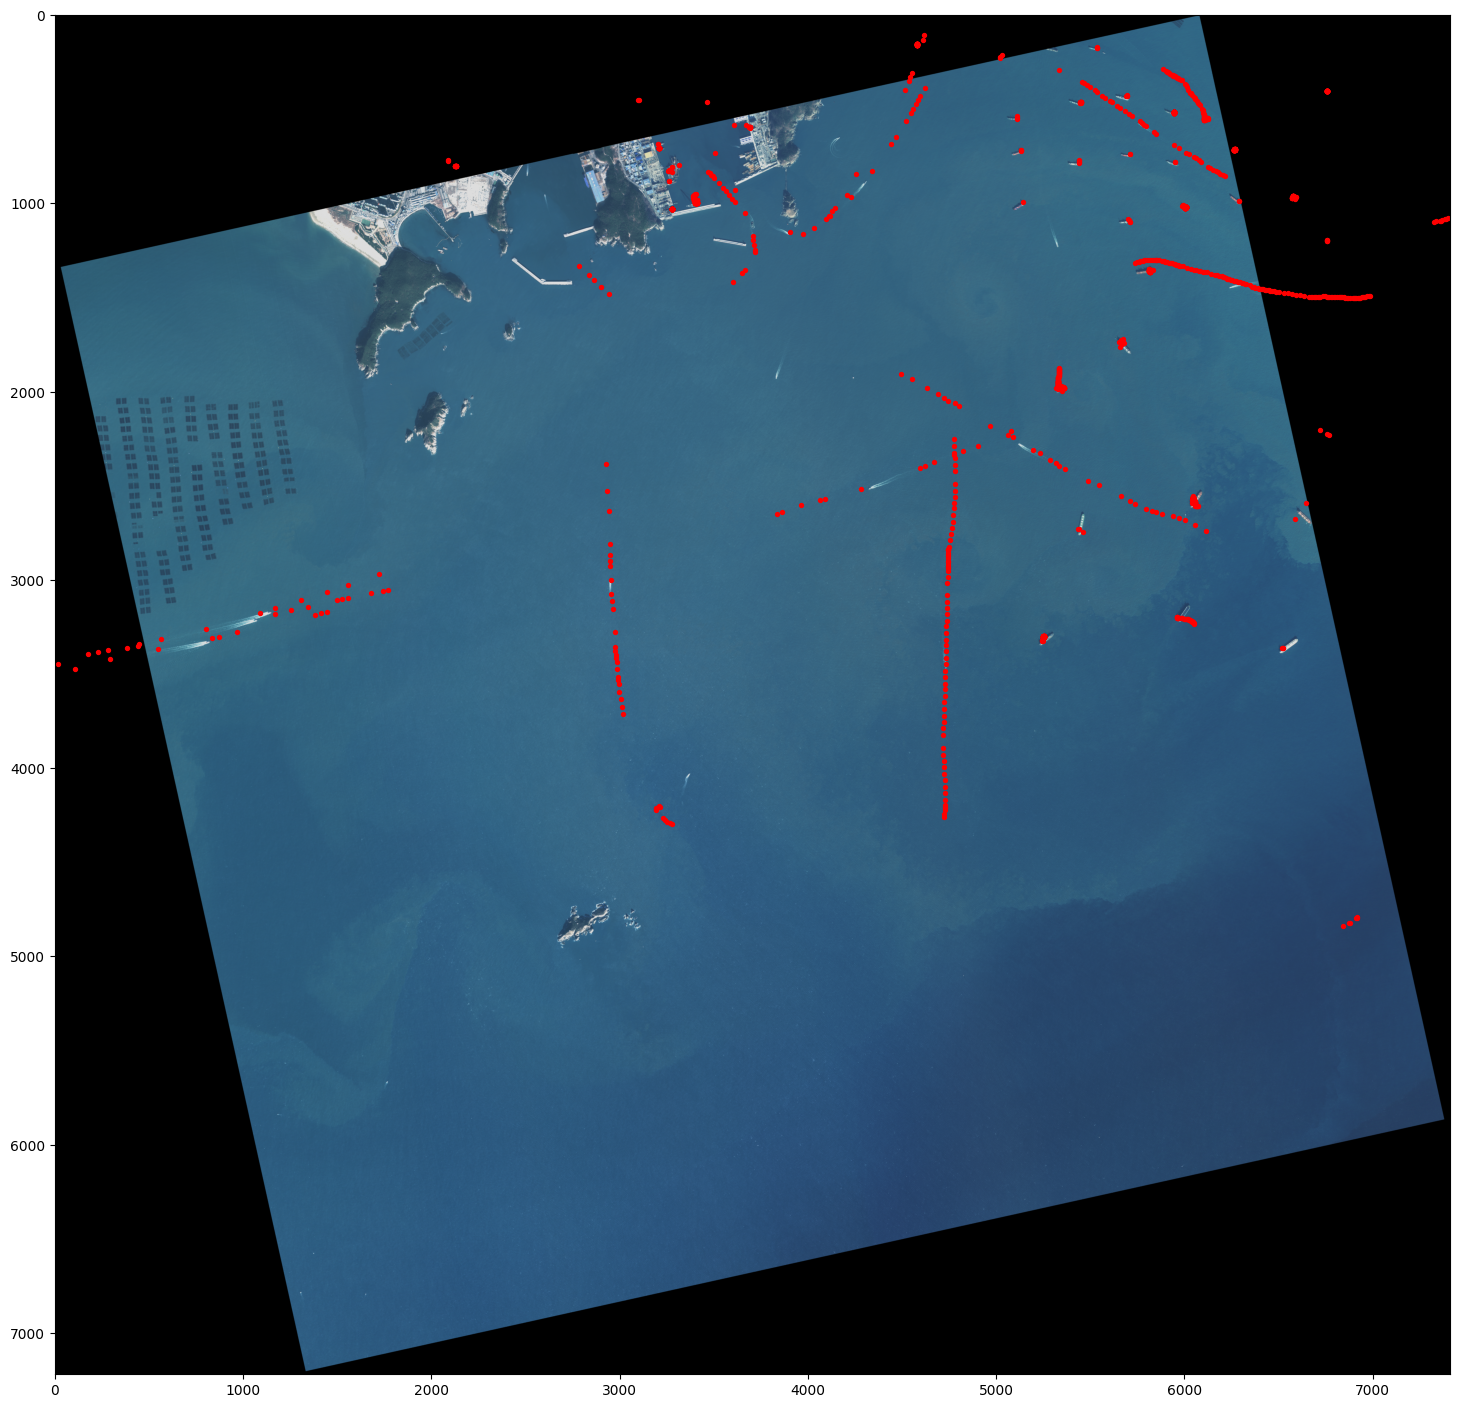

In [84]:
# Scatter Only 
# AIS 

plt.figure(figsize=(18,18))
plt.imshow(img_)
plt.scatter([i[1] for i in q_df['pixels']],[i[0] for i in q_df['pixels']], color='red',marker='o',s=8)

#plt.savefig(args.img_output_scatter,dpi =800)
plt.show()

# Masking BBox in the land 

In [85]:
args.map_path
os.path.exists(args.map_path)

True

------------------- Eric Edited 


<Axes: >

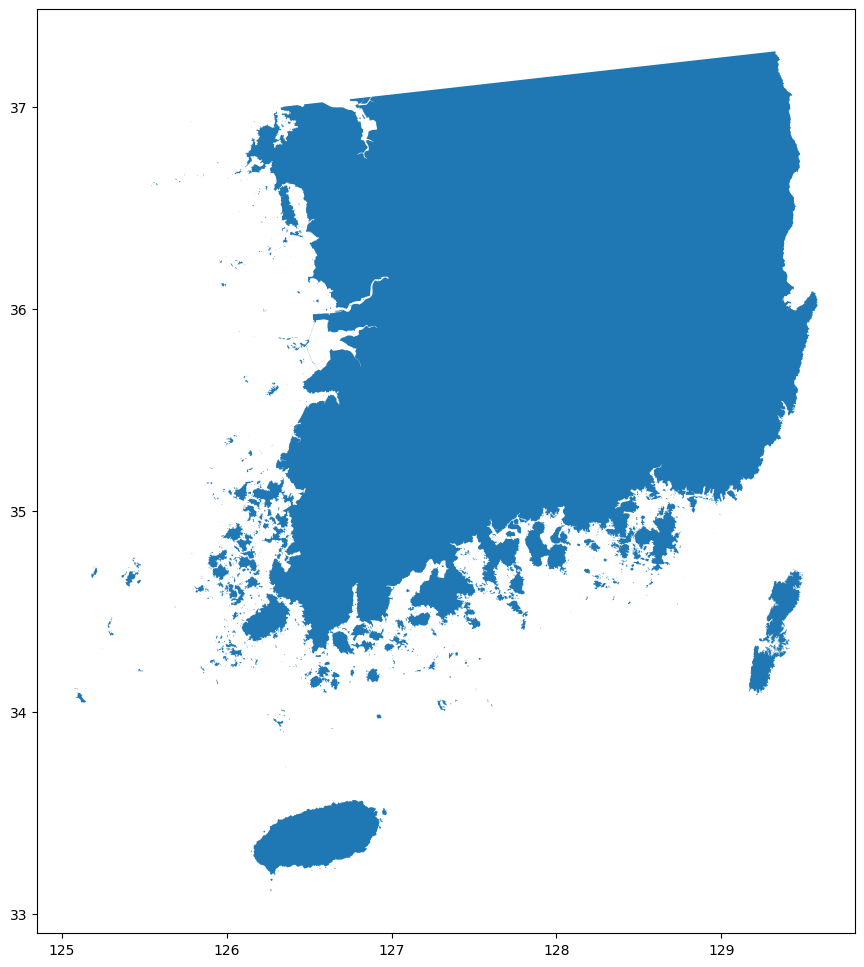

In [86]:
# Visualize Shape File !!
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

gpd.GeoSeries(gdf['geometry']).plot(figsize=(20,12)) #shapefile 플랏


In [87]:
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

# from pixel to utm
tmp_ =[] 
with rasterio.open(tf_path) as map_layer:
    for x,y in zip(M_['bbox x coord'].values, M_['bbox y coord'].values):
        
        x_coord,y_coord = map_layer.xy(y,x) # 여기 순서에 맞춰줘야, long,lat 좌표계가 맞음 
        tmp_.append([x_coord,y_coord])

tmp_1= []
ship_idxs = []
# from utm to latlon 
for idx,co in enumerate(tmp_):
    x,y = co[0],co[1]
    lat,lon = utm.to_latlon(x,y,52,"N")
    # print(lat,lon) # M_ 에서, 미리 설정되었던 AIS와 함께 좌표값 검증하였음

    print("progress : ", idx, " / ",len(tmp_))
    check=gdf['geometry'].contains(Point(lon,lat)) #특정 좌표 (long,lat)이 shapefile 다각형에 포함되는지 확인하기
    checkt=np.where(check == True)[0]
    
    if len(checkt) == 0:
        tmp_1.append(checkt)
        ship_idxs.append(idx)

progress :  0  /  114
progress :  1  /  114
progress :  2  /  114
progress :  3  /  114
progress :  4  /  114
progress :  5  /  114
progress :  6  /  114
progress :  7  /  114
progress :  8  /  114
progress :  9  /  114
progress :  10  /  114
progress :  11  /  114
progress :  12  /  114
progress :  13  /  114
progress :  14  /  114
progress :  15  /  114
progress :  16  /  114
progress :  17  /  114
progress :  18  /  114
progress :  19  /  114
progress :  20  /  114
progress :  21  /  114
progress :  22  /  114
progress :  23  /  114
progress :  24  /  114
progress :  25  /  114
progress :  26  /  114
progress :  27  /  114
progress :  28  /  114
progress :  29  /  114
progress :  30  /  114
progress :  31  /  114
progress :  32  /  114
progress :  33  /  114
progress :  34  /  114
progress :  35  /  114
progress :  36  /  114
progress :  37  /  114
progress :  38  /  114
progress :  39  /  114
progress :  40  /  114
progress :  41  /  114
progress :  42  /  114
progress :  43  /  11

In [88]:
# 마스킹하기 전, 탐색된 선박수
display(M_)

box index  bbox x coord  bbox y coord  bbox width  bbox height  \
0            0   6062.747559   2576.973633   96.756912    20.105816   
1            1   5267.931152   3319.122803   92.396011    20.180357   
2            2   5451.572754   2709.140137  112.080536    18.148483   
3            3   5328.236816   1970.909668   77.750618    15.707102   
4            4   5934.730469    793.562988   67.259132    11.462839   
..         ...           ...           ...         ...          ...   
109         93   2417.215088    855.254150   19.125841     6.979782   
110         96   2051.063721   1696.903564    9.357801     4.799193   
111         99   2725.744629   4817.617676  179.926620    26.085417   
112        100   2190.556152   1519.788818   45.253174    22.638763   
113        103   3084.234131   4800.146973   19.396666    10.563995   

     bbox angle  bbox prob         mmsi  heading   turn  speed  \
0     -0.966657   0.998536  440132370.0    213.0    0.0    0.3   
1     -0.648144   0.998124  440504030.0    234.0    0.0    0.0   
2     -1.359952   0.998062  563176200.0     16.0   -2.0    0.3   
3     -1.490668   0.997652  440709700.0    111.0  127.0    2.4   
4      0.312443   0.997486  440300970.0     24.0    0.0    5.9   
..          ...        ...          ...      ...    ...    ...   
109    0.719385   0.337390          NaN      NaN    NaN    NaN   
110    0.325931   0.323768          NaN      NaN    NaN    NaN   
111   -0.976662   0.319291          NaN      NaN    NaN    NaN   
112    0.481293   0.309767          NaN      NaN    NaN    NaN   
113   -0.602070   0.305726          NaN      NaN    NaN    NaN   

     ais x coord(pixel)  ais y coord(pixel)    ais lat    ais long  \
0                  6072                2610  35.019962  129.062477   
1                  5252                3296  35.007603  129.044513   
2                  5434                2729  35.017837  129.048500   
3                  5334                1874  35.033245  129.046315   
4                  6126                 804  35.052540  129.063692   
..                  ...                 ...        ...         ...   
109                   0                   0   0.000000    0.000000   
110                   0                   0   0.000000    0.000000   
111                   0                   0   0.000000    0.000000   
112                   0                   0   0.000000    0.000000   
113                   0                   0   0.000000    0.000000   

                ais time  
0    2022-12-27 10:46:10  
1    2022-12-27 10:46:03  
2    2022-12-27 10:46:45  
3    2022-12-27 10:46:04  
4    2022-12-27 10:47:20  
..                   ...  
109                    0  
110                    0  
111                    0  
112                    0  
113                    0  

[114 rows x 16 columns]

In [90]:
# visualize the result 
M_masked = M_.iloc[ship_idxs]
del M_masked['box index']
# sav the csv 
M_masked['box index'] = [i for i in range(len(M_masked))]
M_masked = M_masked.reset_index(drop=True)
M_masked.to_csv(args.csv_output_masked)
display(M_masked)

/tmp/ipykernel_2757566/3046557337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_masked['box index'] = [i for i in range(len(M_masked))]


bbox x coord  bbox y coord  bbox width  bbox height  bbox angle  \
0    6062.747559   2576.973633   96.756912    20.105816   -0.966657   
1    5267.931152   3319.122803   92.396011    20.180357   -0.648144   
2    5451.572754   2709.140137  112.080536    18.148483   -1.359952   
3    5328.236816   1970.909668   77.750618    15.707102   -1.490668   
4    5934.730469    793.562988   67.259132    11.462839    0.312443   
..           ...           ...         ...          ...         ...   
92   1784.436646   1965.200928    8.828465     4.183275    0.597555   
93   2823.268066    891.857788   73.231514    13.058599    1.310494   
94   2446.431885   1301.600952   23.388803     8.362907    0.749027   
95   2055.006836   1267.162598   22.325699    10.661184    0.223290   
96   2051.063721   1696.903564    9.357801     4.799193    0.325931   

    bbox prob         mmsi  heading   turn  speed  ais x coord(pixel)  \
0    0.998536  440132370.0    213.0    0.0    0.3                6072   
1    0.998124  440504030.0    234.0    0.0    0.0                5252   
2    0.998062  563176200.0     16.0   -2.0    0.3                5434   
3    0.997652  440709700.0    111.0  127.0    2.4                5334   
4    0.997486  440300970.0     24.0    0.0    5.9                6126   
..        ...          ...      ...    ...    ...                 ...   
92   0.437379          NaN      NaN    NaN    NaN                   0   
93   0.423891          NaN      NaN    NaN    NaN                   0   
94   0.397230          NaN      NaN    NaN    NaN                   0   
95   0.351719          NaN      NaN    NaN    NaN                   0   
96   0.323768          NaN      NaN    NaN    NaN                   0   

    ais y coord(pixel)    ais lat    ais long             ais time  box index  
0                 2610  35.019962  129.062477  2022-12-27 10:46:10          0  
1                 3296  35.007603  129.044513  2022-12-27 10:46:03          1  
2                 2729  35.017837  129.048500  2022-12-27 10:46:45          2  
3                 1874  35.033245  129.046315  2022-12-27 10:46:04          3  
4                  804  35.052540  129.063692  2022-12-27 10:47:20          4  
..                 ...        ...         ...                  ...        ...  
92                   0   0.000000    0.000000                    0         92  
93                   0   0.000000    0.000000                    0         93  
94                   0   0.000000    0.000000                    0         94  
95                   0   0.000000    0.000000                    0         95  
96                   0   0.000000    0.000000                    0         96  

[97 rows x 16 columns]

# Masked Visualization

#-------------- 0.0103
#-------------- 0.0206
#-------------- 0.0309
#-------------- 0.0412
#-------------- 0.0515
#-------------- 0.0619
#-------------- 0.0722
#-------------- 0.0825
#-------------- 0.0928
#-------------- 0.1031
#-------------- 0.1134
#-------------- 0.1237
#-------------- 0.1340
#-------------- 0.1443
#-------------- 0.1546
#-------------- 0.1649
#-------------- 0.1753
#-------------- 0.1856
#-------------- 0.1959
#-------------- 0.2062
#-------------- 0.2165
#-------------- 0.2268
#-------------- 0.2371
#-------------- 0.2474
#-------------- 0.2577
#-------------- 0.2680
#-------------- 0.2784
#-------------- 0.2887
#-------------- 0.2990
#-------------- 0.3093
#-------------- 0.3196
#-------------- 0.3299
#-------------- 0.3402
#-------------- 0.3505
#-------------- 0.3608
#-------------- 0.3711
#-------------- 0.3814
#-------------- 0.3918
#-------------- 0.4021
#-------------- 0.4124
#-------------- 0.4227
#-------------- 0.4330
#-------------- 0.4433
#----------

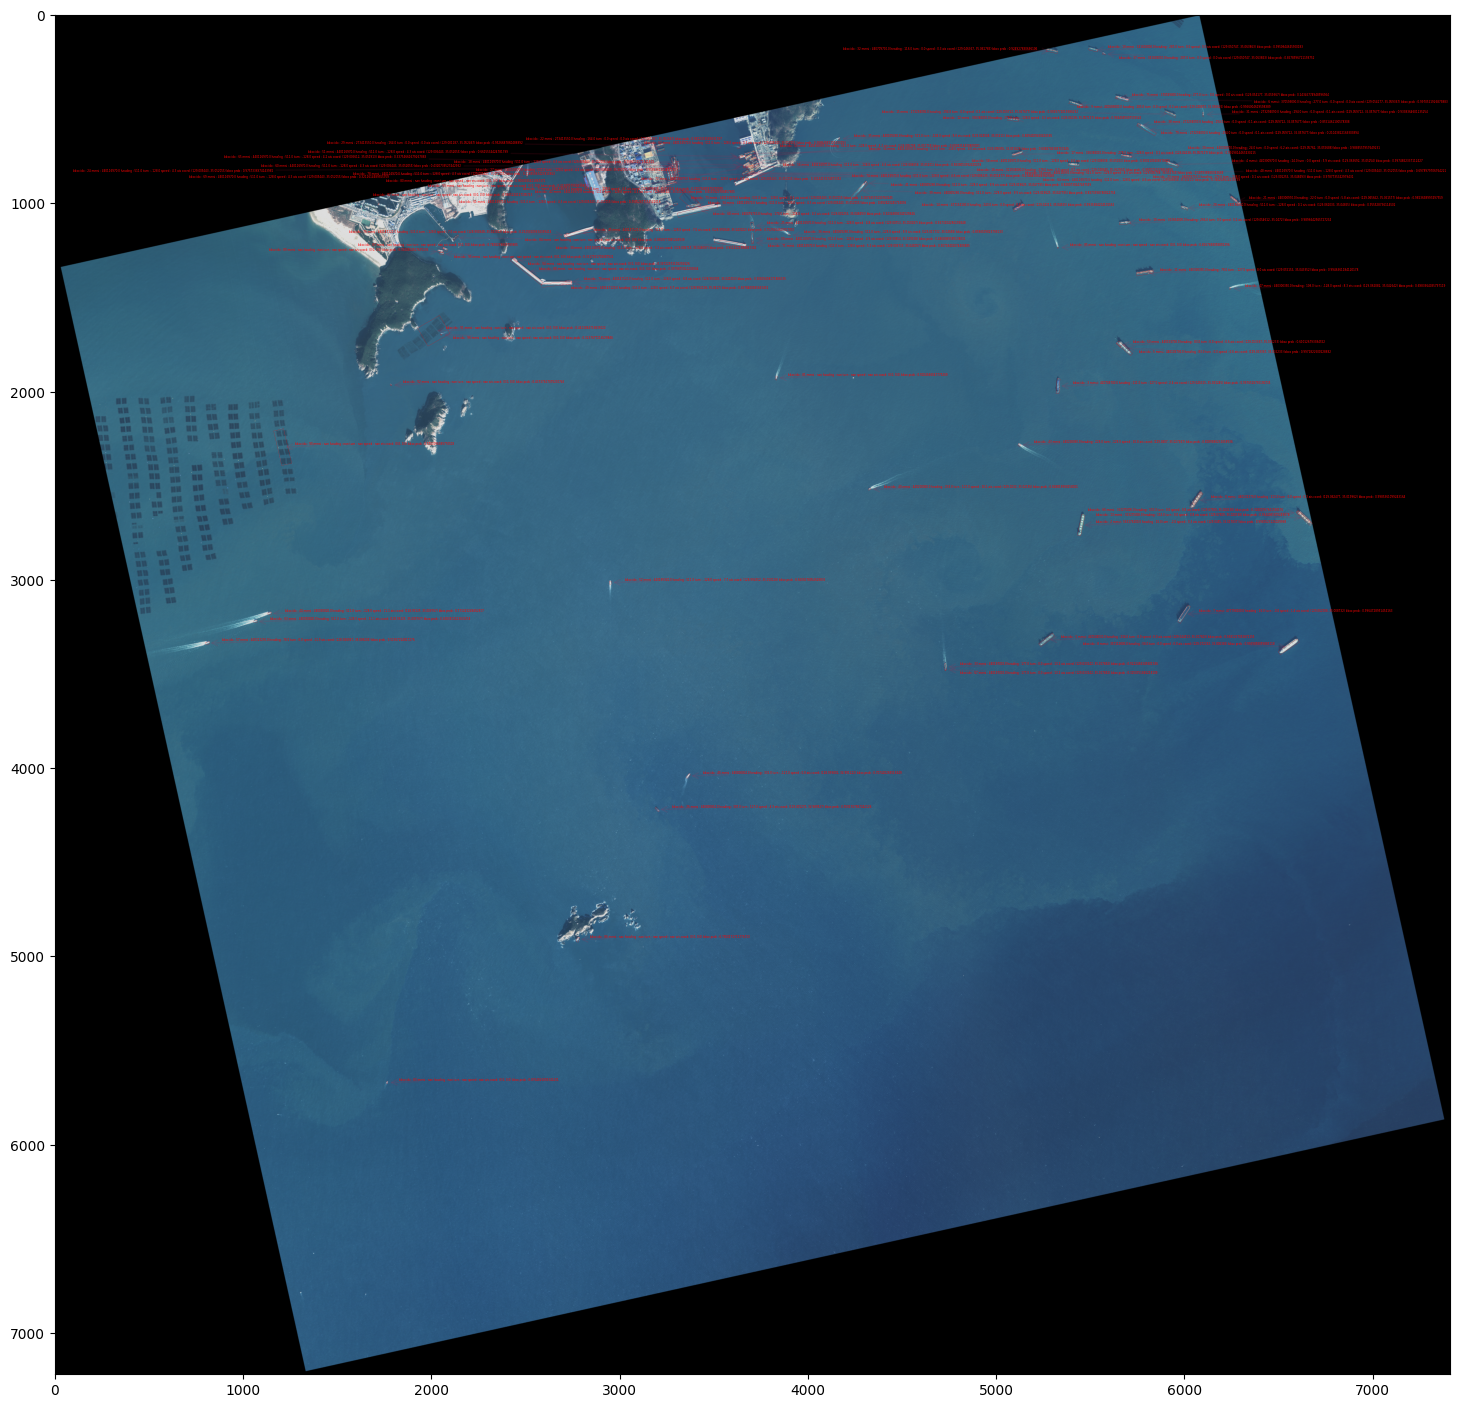

In [91]:
# visualize the result with masking 
# original image 
img_path = args.img_path
img_ = Image.open(img_path)

plt.figure(figsize=(18,18))
plt.imshow(img_)
ax = plt.gca()

#------------------------------------
# Bbox 
bboxes_ = [] 
cnt = 0
box_cnt = 0

# Label
plt_txts = []

# M_masked
for i,row in M_masked.iterrows():
    box_idx = row['box index']
    x = row['bbox x coord']
    y = row['bbox y coord']
    width = row['bbox width']
    height = row['bbox height']
    angle_ = row['bbox angle']
    prob_ = row['bbox prob']

    mmsi_ = row['mmsi']
    heading_ = row['heading']
    turn_ = row['turn']
    speed_ = row['speed']
    lat_ = row['ais lat']
    lon_ = row['ais long']

    
    
    box_cnt+=1
    print(f"#-------------- {box_cnt / len(M_masked):.4f}")
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="red", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi)
    
    ax.add_patch(path_obj)

    # if (lat_ ==0) & (lon_ ==0):
    #     pass
    # else:
    name = f'bbox idx : {box_idx} mmsi : {mmsi_} heading : {heading_} turn : {turn_} speed : {speed_} ais coord: {lon_,lat_} bbox prob : {prob_}'
    plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


adjust_text(plt_txts, 
            force_points=3,
            arrowprops={'arrowstyle' : '->', 
                        'color' : 'crimson',  
                        'alpha' : 0.1}
            )
#------------------------------------

plt.imshow(img_)
plt.savefig(args.img_output_masked,dpi =1200 )
plt.show()
#------------------------------------

# Extract Chips

In [ ]:
#----- load 
img_path = args.img_path
M_chip = pd.read_csv(args.csv_output_masked)

img_part = Image.open(img_path)
prefix_ = args.img_path.split("/")[-1].replace(".png","")

a= os.path.dirname(args.img_path)
chip_folder = os.path.join(a,"chips")

if os.path.exists(chip_folder):
    print("folder exists")
else:
    os.mkdir(chip_folder)
    print("folder created")

folder created


In [ ]:
M_chip

Unnamed: 0  bbox x coord  bbox y coord  bbox width  bbox height  \
0            0    26522.8070     17990.465  262.008940    51.298306   
1            1     7024.4830     14762.350   30.024515    10.071168   
2            2     8257.3040     19619.230   26.857403    10.156816   
3            3     4361.9140     18554.217  124.692696    23.508621   
4            4     8668.2700     14602.061   14.941326     9.923876   
..         ...           ...           ...         ...          ...   
70          70     3977.2014      6999.693   55.501896    25.908354   
71          71     3873.0898     11615.195   33.504320    16.499765   
72          72     4076.0908      6185.417  184.297120    31.105425   
73          73     3915.8190     11491.916   19.108774     6.754956   
74          74     3243.5344      7474.834   17.701742     6.472270   

    bbox angle  bbox prob         mmsi  heading   turn  speed  \
0     0.248208   0.998477  356481000.0    105.0    0.0    0.5   
1    -1.167788   0.944339  440122550.0    511.0 -128.0   10.8   
2    -1.046059   0.930936  440106640.0    511.0 -128.0    4.0   
3    -1.028711   0.901509  440312990.0     34.0    0.0   11.0   
4    -1.560672   0.859161  440103890.0    511.0 -128.0    5.7   
..         ...        ...          ...      ...    ...    ...   
70    1.494848   0.593255          NaN      NaN    NaN    NaN   
71    0.187588   0.558492          NaN      NaN    NaN    NaN   
72   -0.616431   0.522650          NaN      NaN    NaN    NaN   
73    0.403343   0.521521          NaN      NaN    NaN    NaN   
74   -1.252228   0.517963          NaN      NaN    NaN    NaN   

    ais x coord(pixel)  ais y coord(pixel)    ais lat    ais long  \
0                26365               18024  35.165670  129.350277   
1                 6873               14743  35.180723  129.243300   
2                 8084               19726  35.158243  129.249882   
3                 4308               18556  35.163562  129.229165   
4                 8695               14774  35.180565  129.253305   
..                 ...                 ...        ...         ...   
70                   0                   0   0.000000    0.000000   
71                   0                   0   0.000000    0.000000   
72                   0                   0   0.000000    0.000000   
73                   0                   0   0.000000    0.000000   
74                   0                   0   0.000000    0.000000   

             ais time  box index  
0   023-10-02 10:51:3          0  
1   023-10-02 10:50:3          1  
2   023-10-02 10:56:5          2  
3   023-10-02 10:55:4          3  
4   023-10-02 10:55:1          4  
..                ...        ...  
70                  0         70  
71                  0         71  
72                  0         72  
73                  0         73  
74                  0         74  

[75 rows x 17 columns]

In [ ]:
prefix_

'0-Pusan-2023-AO_9_C1_20231002015544_14047_00028701_L1G_PS'

#-------------------- 149
{0}
{1}
{2}
{3}
{4}
{5}
{6}


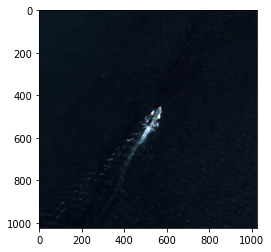

In [ ]:

print("#--------------------",len(M_))
for i,row in M_chip.iterrows():

    if row["ais time"] != str(0):
        print({i})
        box_ = row
        x = box_["bbox x coord"]
        y = box_["bbox y coord"]
        width =  box_["bbox width"]
        height = box_["bbox height"]
        angle_ = box_["bbox angle"]
        box_idx = box_['box index']

        pixel_slice = 512
        a_ = img_part.crop(( x-pixel_slice , y-pixel_slice, x+pixel_slice , y+pixel_slice ))
        #plt.figure(figsize=(18,18))
        
        folder_ = chip_folder
        saved_name = f"{box_idx}_{prefix_}.png"
        
        
        #plt.figure(figsize=(18,18))
        #plt.savefig(os.path.join(folder_,saved_name),dpi =600 )
        a_.save(os.path.join(folder_,saved_name))
        plt.imshow(a_)
    

In [ ]:
import subprocess


zip_command = ["zip", "-jr","chips_v2.zip", folder_]

try:    
    subprocess.run(zip_command, check=True,cwd=folder_.replace("/chips",""))
    print("Zip operation successful.")
except subprocess.CalledProcessError as e:
    print(f"Error during zip operation: {e}")

Zip operation successful.
